# Milestone Report


## Prediction of weather for a city for a given period


### The problem being solved

The weather in US is so variant across the year and across different cities that it is hard to know what weather one might run into in a new city . When people travel between different places in US for business or pleasure, they might be ill prepared for the weather they face if they are not aware of the weather in the destination city.  When planning in advance, the historic weather data can provide them with the prediction of weather for a particular city.
Also, people planning for vacation can pick and choose a vacation place based on the prediction of the weather for a given period or based on the given window of the temperature.  

 

### Target audience

With this analysis, a weather forecasting company can provide the customers with prediction of weather with the help of the historic data they posses.The customer would know what kind of temperatures to expect in the destination city.


### Data to be used 

The dataset being used contains historical hourly temperatures for 30 US and Canadian cities.
Data is acquired from kaggle, originally acquired from using Weather API on the OpenWeatherMap website
This dataset consists csv file of more than 100k rows of data with hourly temperature for 30 cities from the year 2012 - 2017 



### Data Wrangling

The dataset consists of temperatures for each hour for the year 2012- 2017 for 28 US Cities and 2 cities from Canada. The dataset is inspected for invalid entries by checking for NANs and taking care of those by forwarding filling NAN values. Also, I had to delete few days worth of data since it contained NANs for few cities. Since the dataset has 5 years worth of data, deleting few days worth of data will be have a big impact on it. There are few outliers in the datasset, I am assuming they are valid entries and that they are big change in temperatures.

In [12]:
# Dataset being imported as dataframe
import pandas as pd
file = 'temperature.csv'
df = pd.read_csv(file)
df.head(100)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.40,304.40,303.50
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.40,304.40,303.50
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.40,304.40,303.50
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.40,304.40,303.50
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.40,304.40,303.50
6,2012-10-01 18:00:00,284.620868,282.117710,289.417494,281.767681,291.846821,291.572917,293.359284,296.700424,285.472132,...,286.037673,288.564730,285.887208,287.368410,306.652574,304.150361,310.158846,304.40,304.40,303.50
7,2012-10-01 19:00:00,284.618824,282.126324,289.403119,281.760297,291.841480,291.582772,293.348320,296.723403,285.551525,...,286.131290,288.643994,285.900348,287.413990,306.406261,304.106534,310.074615,304.40,304.40,303.50
8,2012-10-01 20:00:00,284.616781,282.134939,289.388745,281.752912,291.836139,291.592626,293.337356,296.746381,285.630919,...,286.224906,288.723257,285.913487,287.459569,306.159948,304.062708,309.990385,304.40,304.40,303.50
9,2012-10-01 21:00:00,284.614738,282.143553,289.374370,281.745528,291.830798,291.602480,293.326392,296.769360,285.710312,...,286.318522,288.802521,285.926627,287.505149,305.913635,304.018881,309.906154,304.40,304.40,303.50


In [15]:
df.shape

(45252, 37)

In [16]:
# deleting non US cities, other than Montreal and Vancouver
df = df.iloc[:, :-6] 
df.shape

(45252, 31)

In [17]:
# Sum of NANs in the dataframe
df.isnull().sum()

datetime           0
Vancouver        794
Portland           0
San Francisco    792
Seattle            2
Los Angeles        2
San Diego          0
Las Vegas          0
Phoenix            2
Albuquerque        0
Denver             0
San Antonio        0
Dallas             3
Houston            2
Kansas City        0
Minneapolis       12
Saint Louis        0
Chicago            2
Nashville          1
Indianapolis       6
Atlanta            5
Detroit            0
Jacksonville       0
Charlotte          2
Miami            804
Pittsburgh         2
Toronto            0
Philadelphia       2
New York         792
Montreal           2
Boston             2
dtype: int64

### The above table shows the number of NANs in each column

In [18]:
#Remove the top row, the whole row has NaNs, discarding it should not impact the dataset
df = df.drop(df.index[0])
df.shape

(45251, 31)

In [19]:
df.info()
#Dataframe info shows that columns-Vancouver, Miami, New York NaN values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45251 entries, 2 to 45252
Data columns (total 31 columns):
datetime         45251 non-null object
Vancouver        44457 non-null float64
Portland         45251 non-null float64
San Francisco    44459 non-null float64
Seattle          45249 non-null float64
Los Angeles      45249 non-null float64
San Diego        45251 non-null float64
Las Vegas        45251 non-null float64
Phoenix          45249 non-null float64
Albuquerque      45251 non-null float64
Denver           45251 non-null float64
San Antonio      45251 non-null float64
Dallas           45248 non-null float64
Houston          45249 non-null float64
Kansas City      45251 non-null float64
Minneapolis      45239 non-null float64
Saint Louis      45251 non-null float64
Chicago          45249 non-null float64
Nashville        45250 non-null float64
Indianapolis     45245 non-null float64
Atlanta          45246 non-null float64
Detroit          45251 non-null float64
Jacksonville

In [21]:
#Removing few days worth of data from 5 years of data to remove NaNs
df = df[:-792]
df.shape

(44459, 31)

In [22]:
#Checking for NaNs, shows there are few NaNs
df.isnull().sum()

datetime          0
Vancouver         2
Portland          0
San Francisco     0
Seattle           2
Los Angeles       2
San Diego         0
Las Vegas         0
Phoenix           2
Albuquerque       0
Denver            0
San Antonio       0
Dallas            3
Houston           2
Kansas City       0
Minneapolis      12
Saint Louis       0
Chicago           2
Nashville         1
Indianapolis      6
Atlanta           5
Detroit           0
Jacksonville      0
Charlotte         2
Miami            12
Pittsburgh        2
Toronto           0
Philadelphia      2
New York          0
Montreal          2
Boston            2
dtype: int64

In [23]:
df.columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston'],
      dtype='object')

In [24]:
# Forward filling the NaNs
col = ['Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston']
df[col] = df[col].ffill()


In [25]:
#Check for null values, no more NaNs
df.isnull().sum()

datetime         0
Vancouver        0
Portland         0
San Francisco    0
Seattle          0
Los Angeles      0
San Diego        0
Las Vegas        0
Phoenix          0
Albuquerque      0
Denver           0
San Antonio      0
Dallas           0
Houston          0
Kansas City      0
Minneapolis      0
Saint Louis      0
Chicago          0
Nashville        0
Indianapolis     0
Atlanta          0
Detroit          0
Jacksonville     0
Charlotte        0
Miami            0
Pittsburgh       0
Toronto          0
Philadelphia     0
New York         0
Montreal         0
Boston           0
dtype: int64

In [26]:
df.shape

(44459, 31)

(44459, 16)


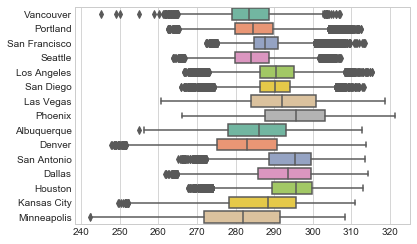

In [29]:
#Box plot for 1st 16 cities in the dataset showing the outliers
#Retaining the outliers, outliers in this case are the extreme temperatures and not necessarily data entry errors.
df_cities1 = df.iloc[:,0:16]
print(df_cities1.shape)
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(data=df_cities1, orient="h", palette="Set2")

(31122, 14)


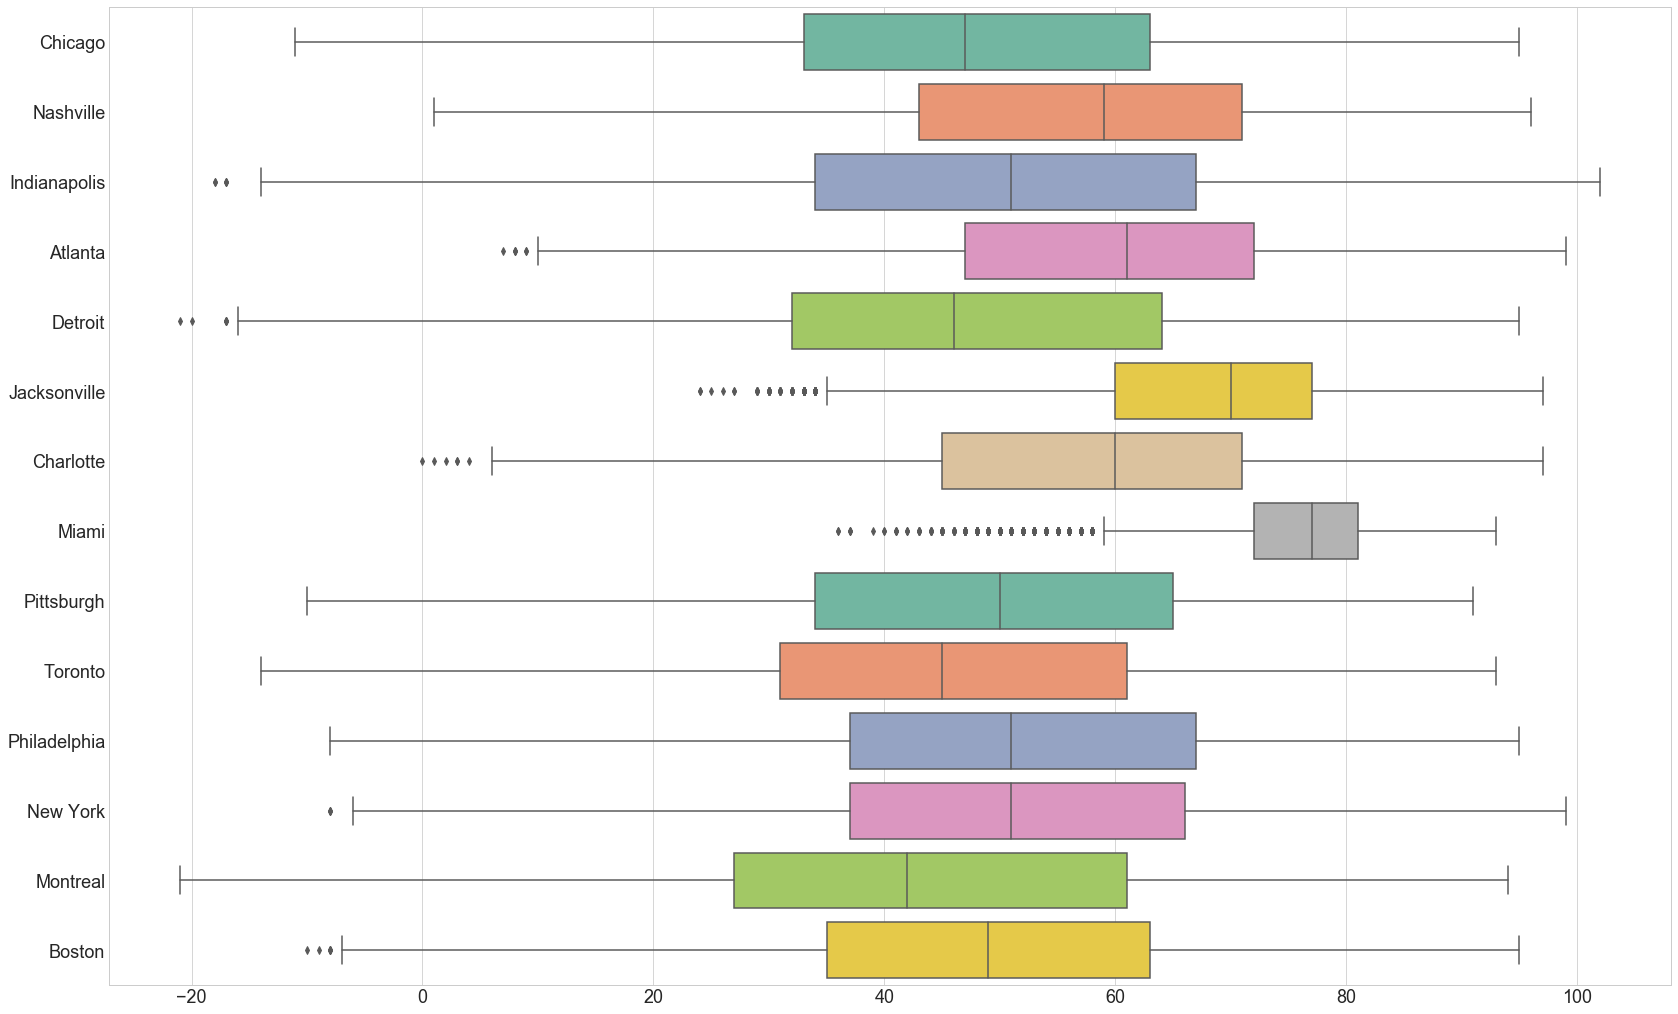

In [51]:
#Box plot for remaining 15 cities in the dataset
df_cities2 = df.iloc[:,16:31]
print(df_cities2.shape)
sns.set_style("whitegrid")
sns.boxplot(data=df_cities2, orient="h", palette="Set2")

### The spread of temperature for each city can be visualized above

In [30]:
#Saving cleaned data 
df.to_csv("temperature_cleaned.csv")

In [31]:
#Dividing the data set into training data set and test data set for the purpose of training and testing 
#70% of the dataset being saved in Temperature_train.csv, 30% of the dataset being saved in Temperature_test.csv
df_train = df[:31122]
print(df_train.shape)
df_train.to_csv("temperature_train.csv")
df_test = df[31122:]
print(df_test.shape)
df_test.to_csv("temperature_test.csv")

(31122, 31)
(13337, 31)


In [53]:
#df_test.head(2)

In [33]:
# Dataset being loaded as dataframe
file = 'temperature_train.csv'

# datetime column parsed as Datetime type, datetime column as index
df = pd.read_csv(file, parse_dates=['datetime'], index_col='datetime')

# Deleting unnamed column which is introduced from csv file
df = df.drop(df.columns[[0]], axis=1)

# Convert Kelvin to Fahrenheit
df = df.applymap(lambda x: int(9/5 * (x-273) + 32))


In [34]:
df2013 = df[df.index.year == 2013]
df2014 = df[df.index.year == 2014]
df2015 = df[df.index.year == 2015]

max = df.max().nlargest(3)
print('Top 3 warmest cities')
print(max)

min = df.min().nsmallest(3)
print('\nTop 3 coldest cities')
print(min)

max2013 = df2013.max().nlargest(3)
print('\nTop 3 warmest cities in 2013')
print(max2013)
max2014 = df2014.max().nlargest(3)
print('\nTop 3 warmest cities in 2014')
print(max2014)
max2015 = df2015.max().nlargest(3)
print('\nTop 3 warmest cities in 2015')
print(max2015)

min2013 = df2013.min().nsmallest(3)
print('\nTop 3 coldest cities in 2013')
print(min2013)
min2014 = df2014.min().nsmallest(3)
print('\nTop 3 coldest cities in 2014')
print(min2014)
min2015 = df2015.min().nsmallest(3)
print('\nTop 3 coldest cities in 2015')
print(min2015)

Top 3 warmest cities
Phoenix      116
Las Vegas    114
Dallas       106
dtype: int64

Top 3 coldest cities
Minneapolis   -23
Detroit       -21
Montreal      -21
dtype: int64

Top 3 warmest cities in 2013
Phoenix      116
Las Vegas    114
Dallas       106
dtype: int64

Top 3 warmest cities in 2014
Phoenix        112
Las Vegas      110
San Antonio    101
dtype: int64

Top 3 warmest cities in 2015
Phoenix      113
Las Vegas    110
Dallas       105
dtype: int64

Top 3 coldest cities in 2013
Montreal      -21
Minneapolis   -18
Kansas City    -5
dtype: int64

Top 3 coldest cities in 2014
Vancouver     -18
Minneapolis   -16
Denver        -13
dtype: int64

Top 3 coldest cities in 2015
Minneapolis    -23
Detroit        -21
Indianapolis   -18
dtype: int64


## 1. Which are the three warmest cities ? Which are the three coldest cities ?

### The three warmest cities in the given dataset are Phoenix, Las Vegas and Dallas and it can be seen temperatures reaching max during the month of July.

### The three coldest cities are Minneapolis, Montreal, Detriot. Coldest temperatures are seen in the month of January and December. Vancouver has knocked down Minneapolies to second coldest in the year 2014, which can be attributed to the cold front on Nov 30th with the temperature varying between -18F and -9F between Nov 30 2014 and Dec 02 2014

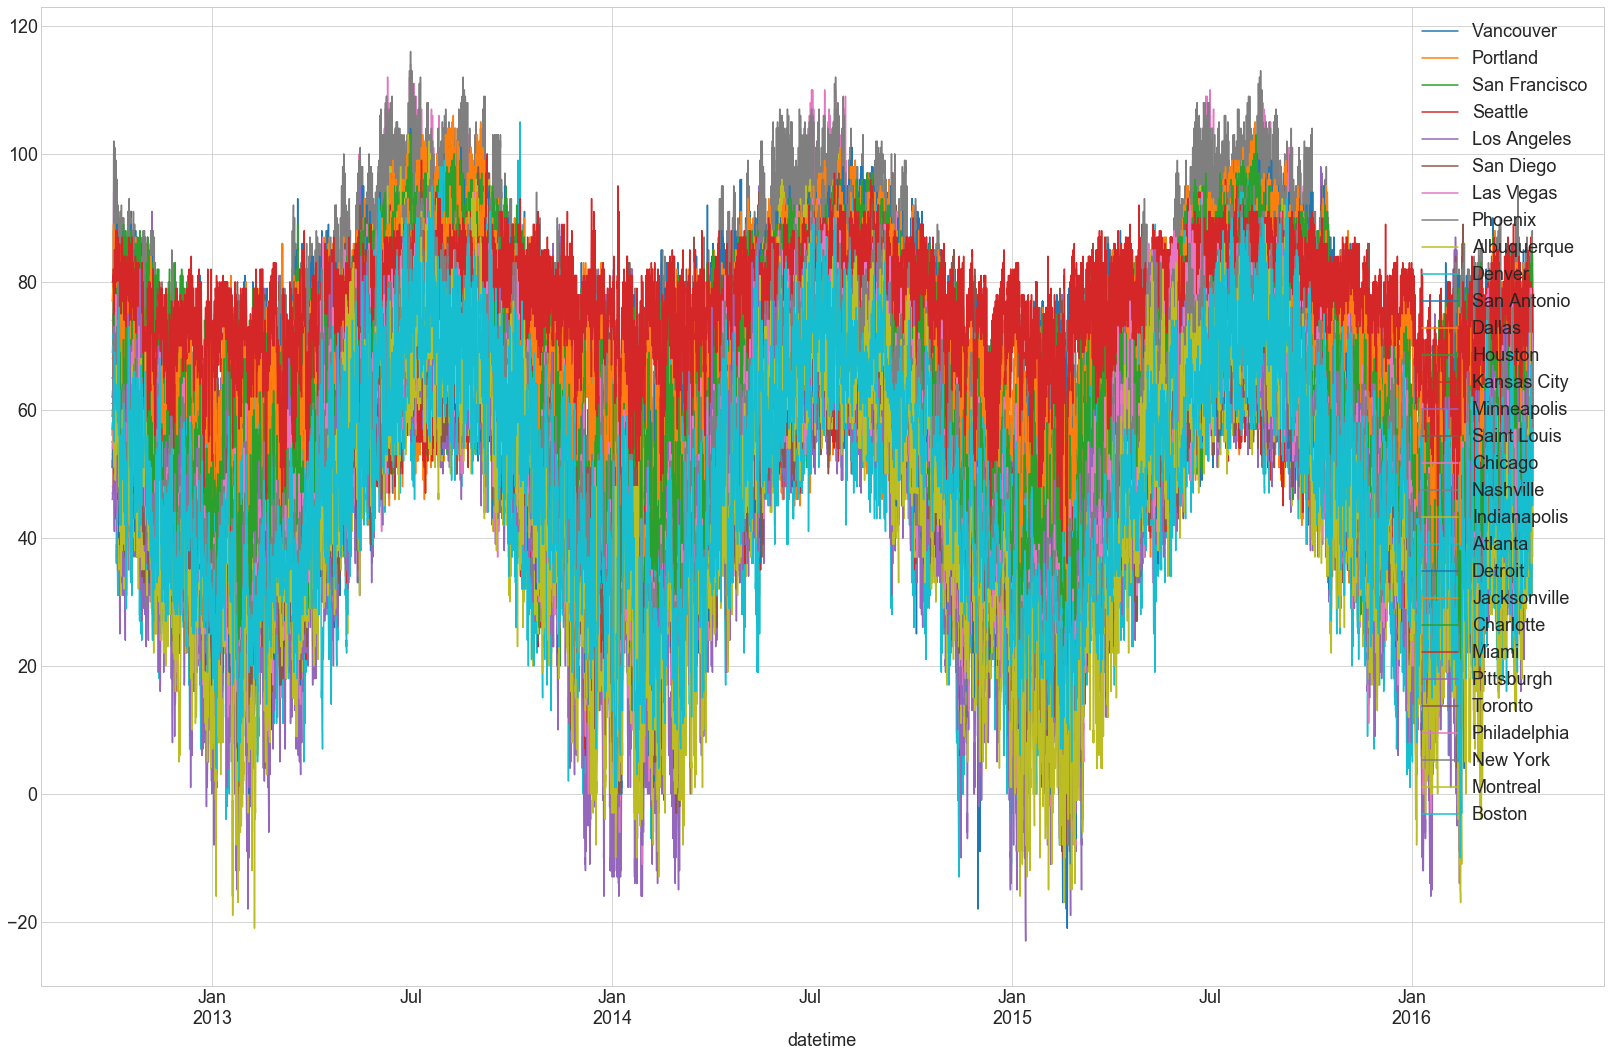

In [35]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (28,18)
plt.rcParams.update({'font.size': 18})
df.plot()

## Vancouver's dip in temperature in Nov 2014

datetime
2014-11-30 19:00:00   -18
2014-11-30 20:00:00   -11
2014-11-30 21:00:00     0
Name: Vancouver, dtype: int64


Text(0.5,1,"Vancouver's dip in temperature in Nov 2014")

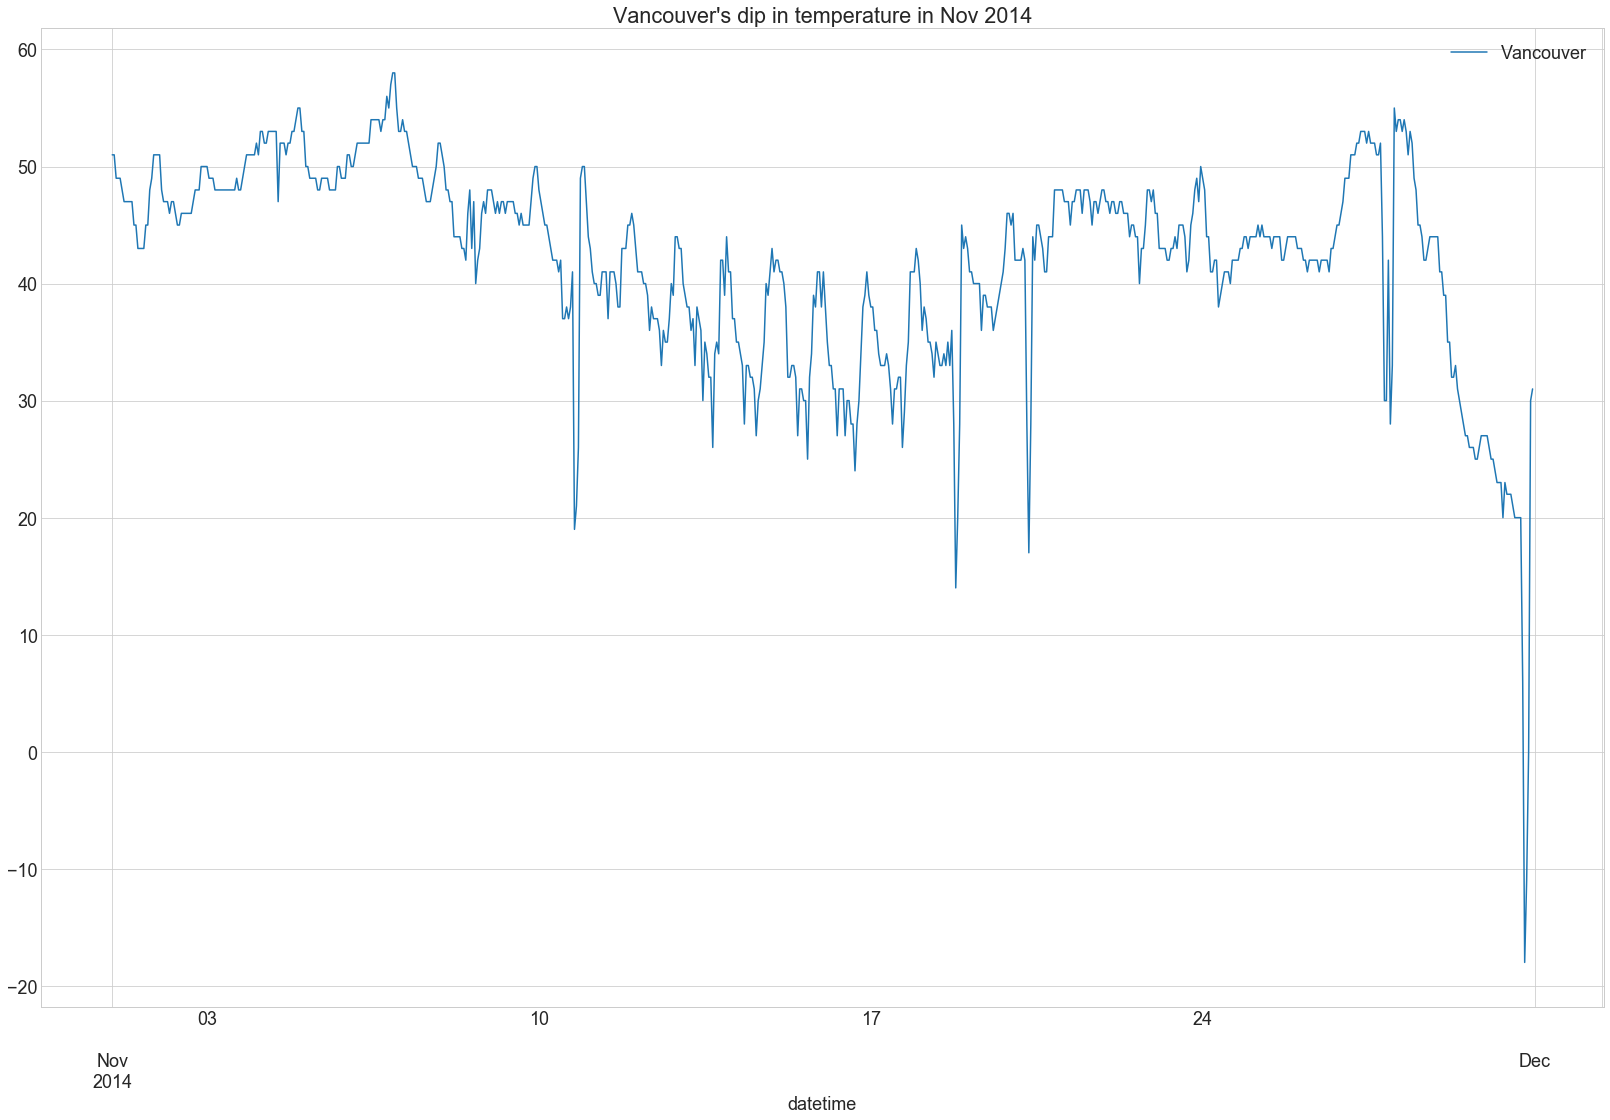

In [40]:
df_nov_2014 = df2014[df2014.index.month == 11][['Vancouver']]
ax = df_nov_2014.plot()

print(df_nov_2014['Vancouver'].nsmallest(3))
ax.set_title('Vancouver\'s dip in temperature in Nov 2014')



 ### From the box plot, we could see outliers for Vancouver. Digging in the data for Vancouver, we can see there was a sharp dip in temperature in the month of November 2014. The temperature at 7pm and 8pm on November 30th are -18F and -11F respectively.

## Pittsburgh's temperature trend

Text(0.5,1,"Pittsburgh's temperature trend")

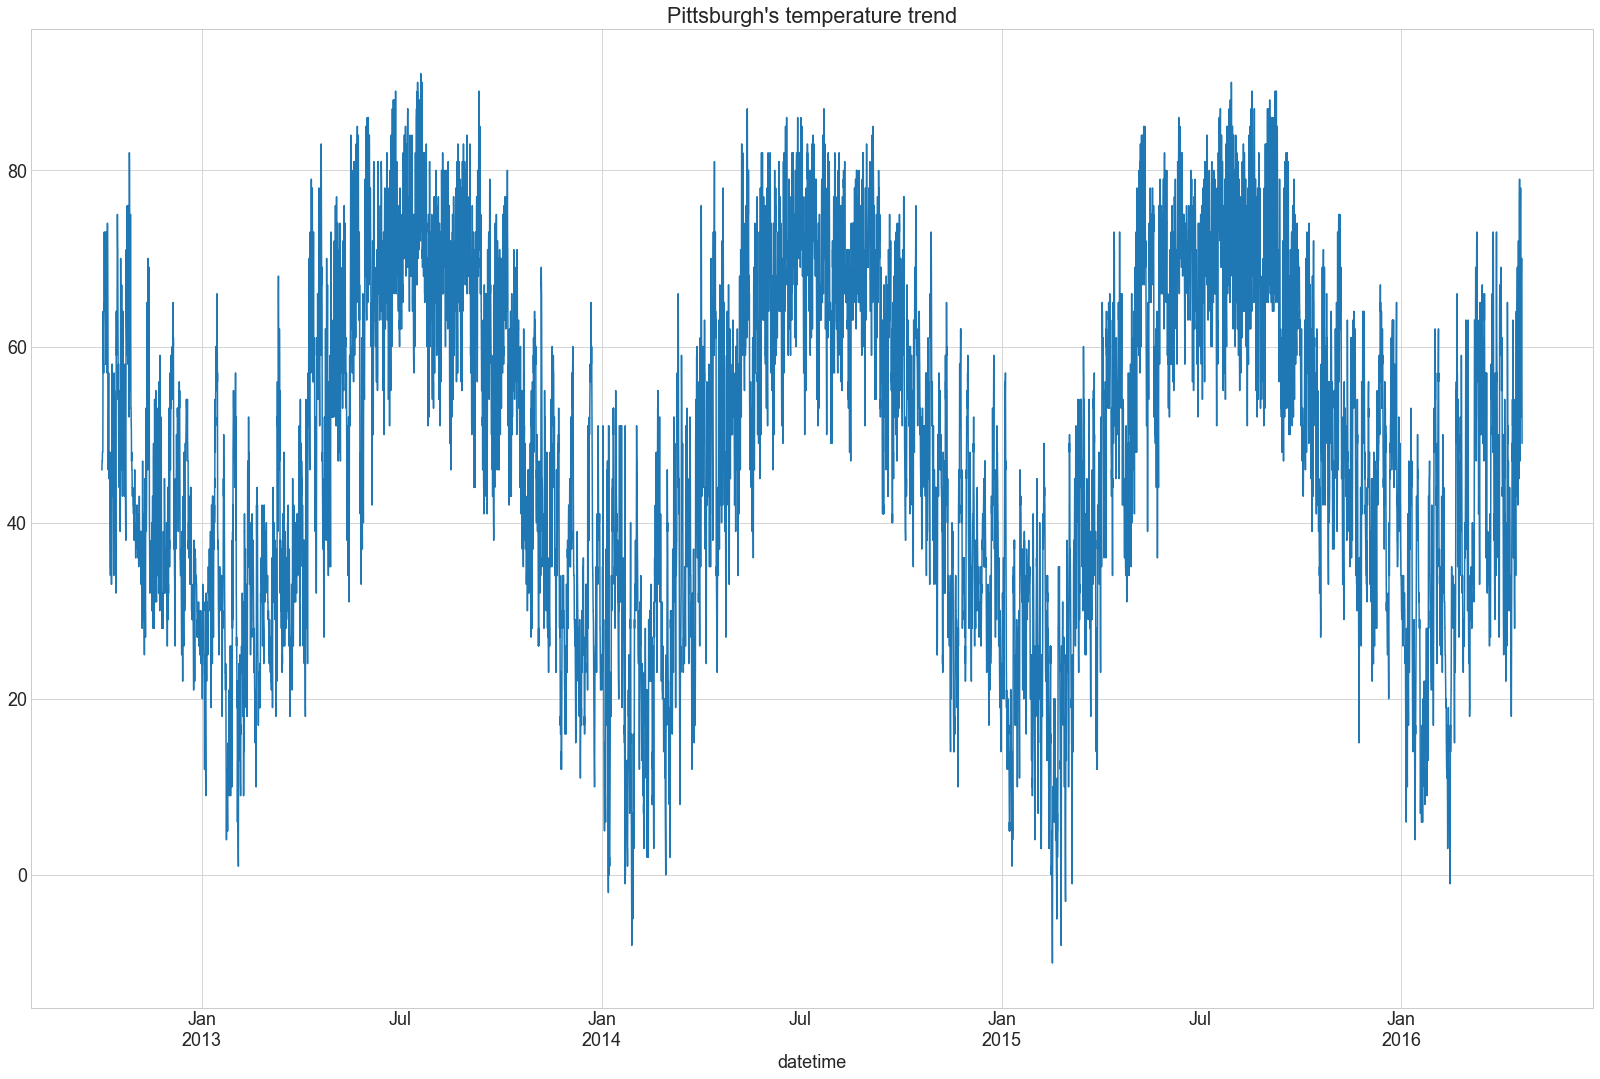

In [42]:
df_pit = df['Pittsburgh']
ax1 = df_pit.plot()
ax1.set_title('Pittsburgh\'s temperature trend')

### Pittsburgh's temperature trend as seen above has winter months from November to March, temperature starts going up in mid April , summer months typically being from May to September. Feburary of 2015 has been the coldest in the above data set. Feburary 2015 temperatures have been the second lowest temperatures from 1948.
   

## 2. Which cities have Average 70F or more in the month of April, during the time of spring break?¶

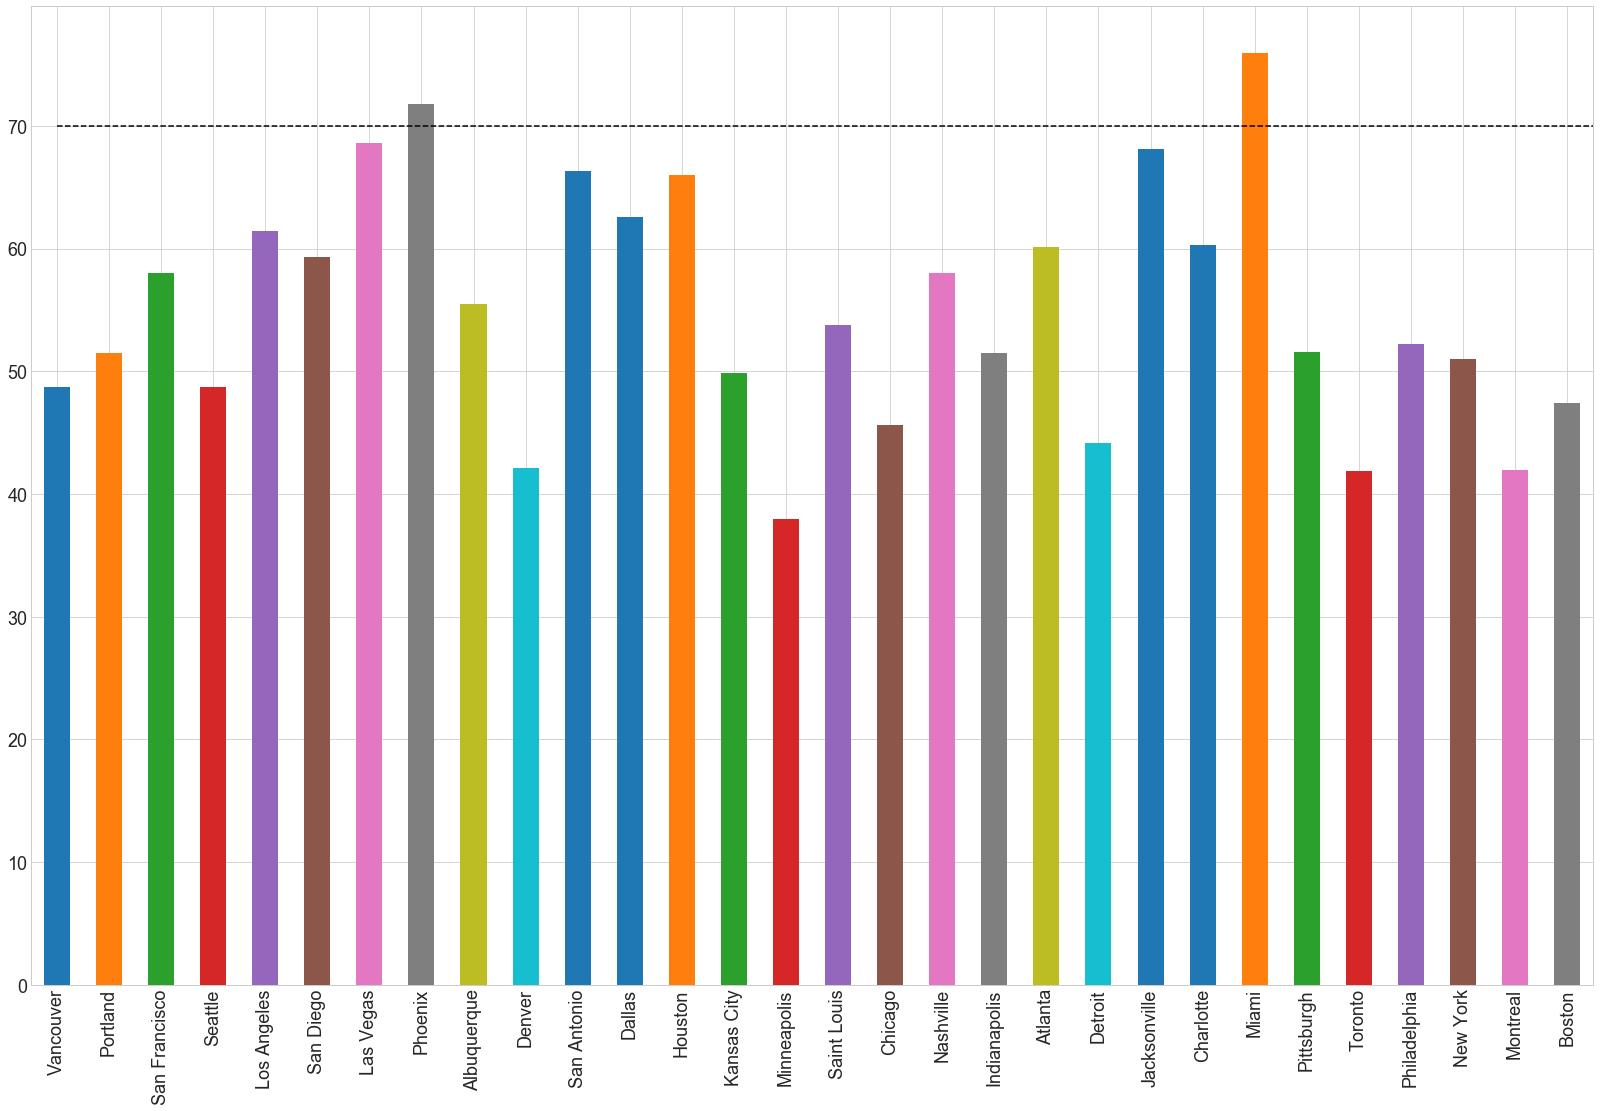

In [44]:
#apr_df1 = df2013.iloc[5039:5783, :]
apr_df = df2013[df2013.index.month == 4]
#print(apr_df.head(1))
#print(apr_df.tail(1))
apr_df.mean(axis=0).plot(kind='bar')
mean_df = apr_df.mean(axis=0)
cutoff = 70
plt.plot([0., len(mean_df)], [cutoff, cutoff], "k--")


### From the graph below, we can see the cities which has average of 75F or more in the month of April - Phoenix, Miami

# Now we will see how the cities are related to each other w.r.t temperature

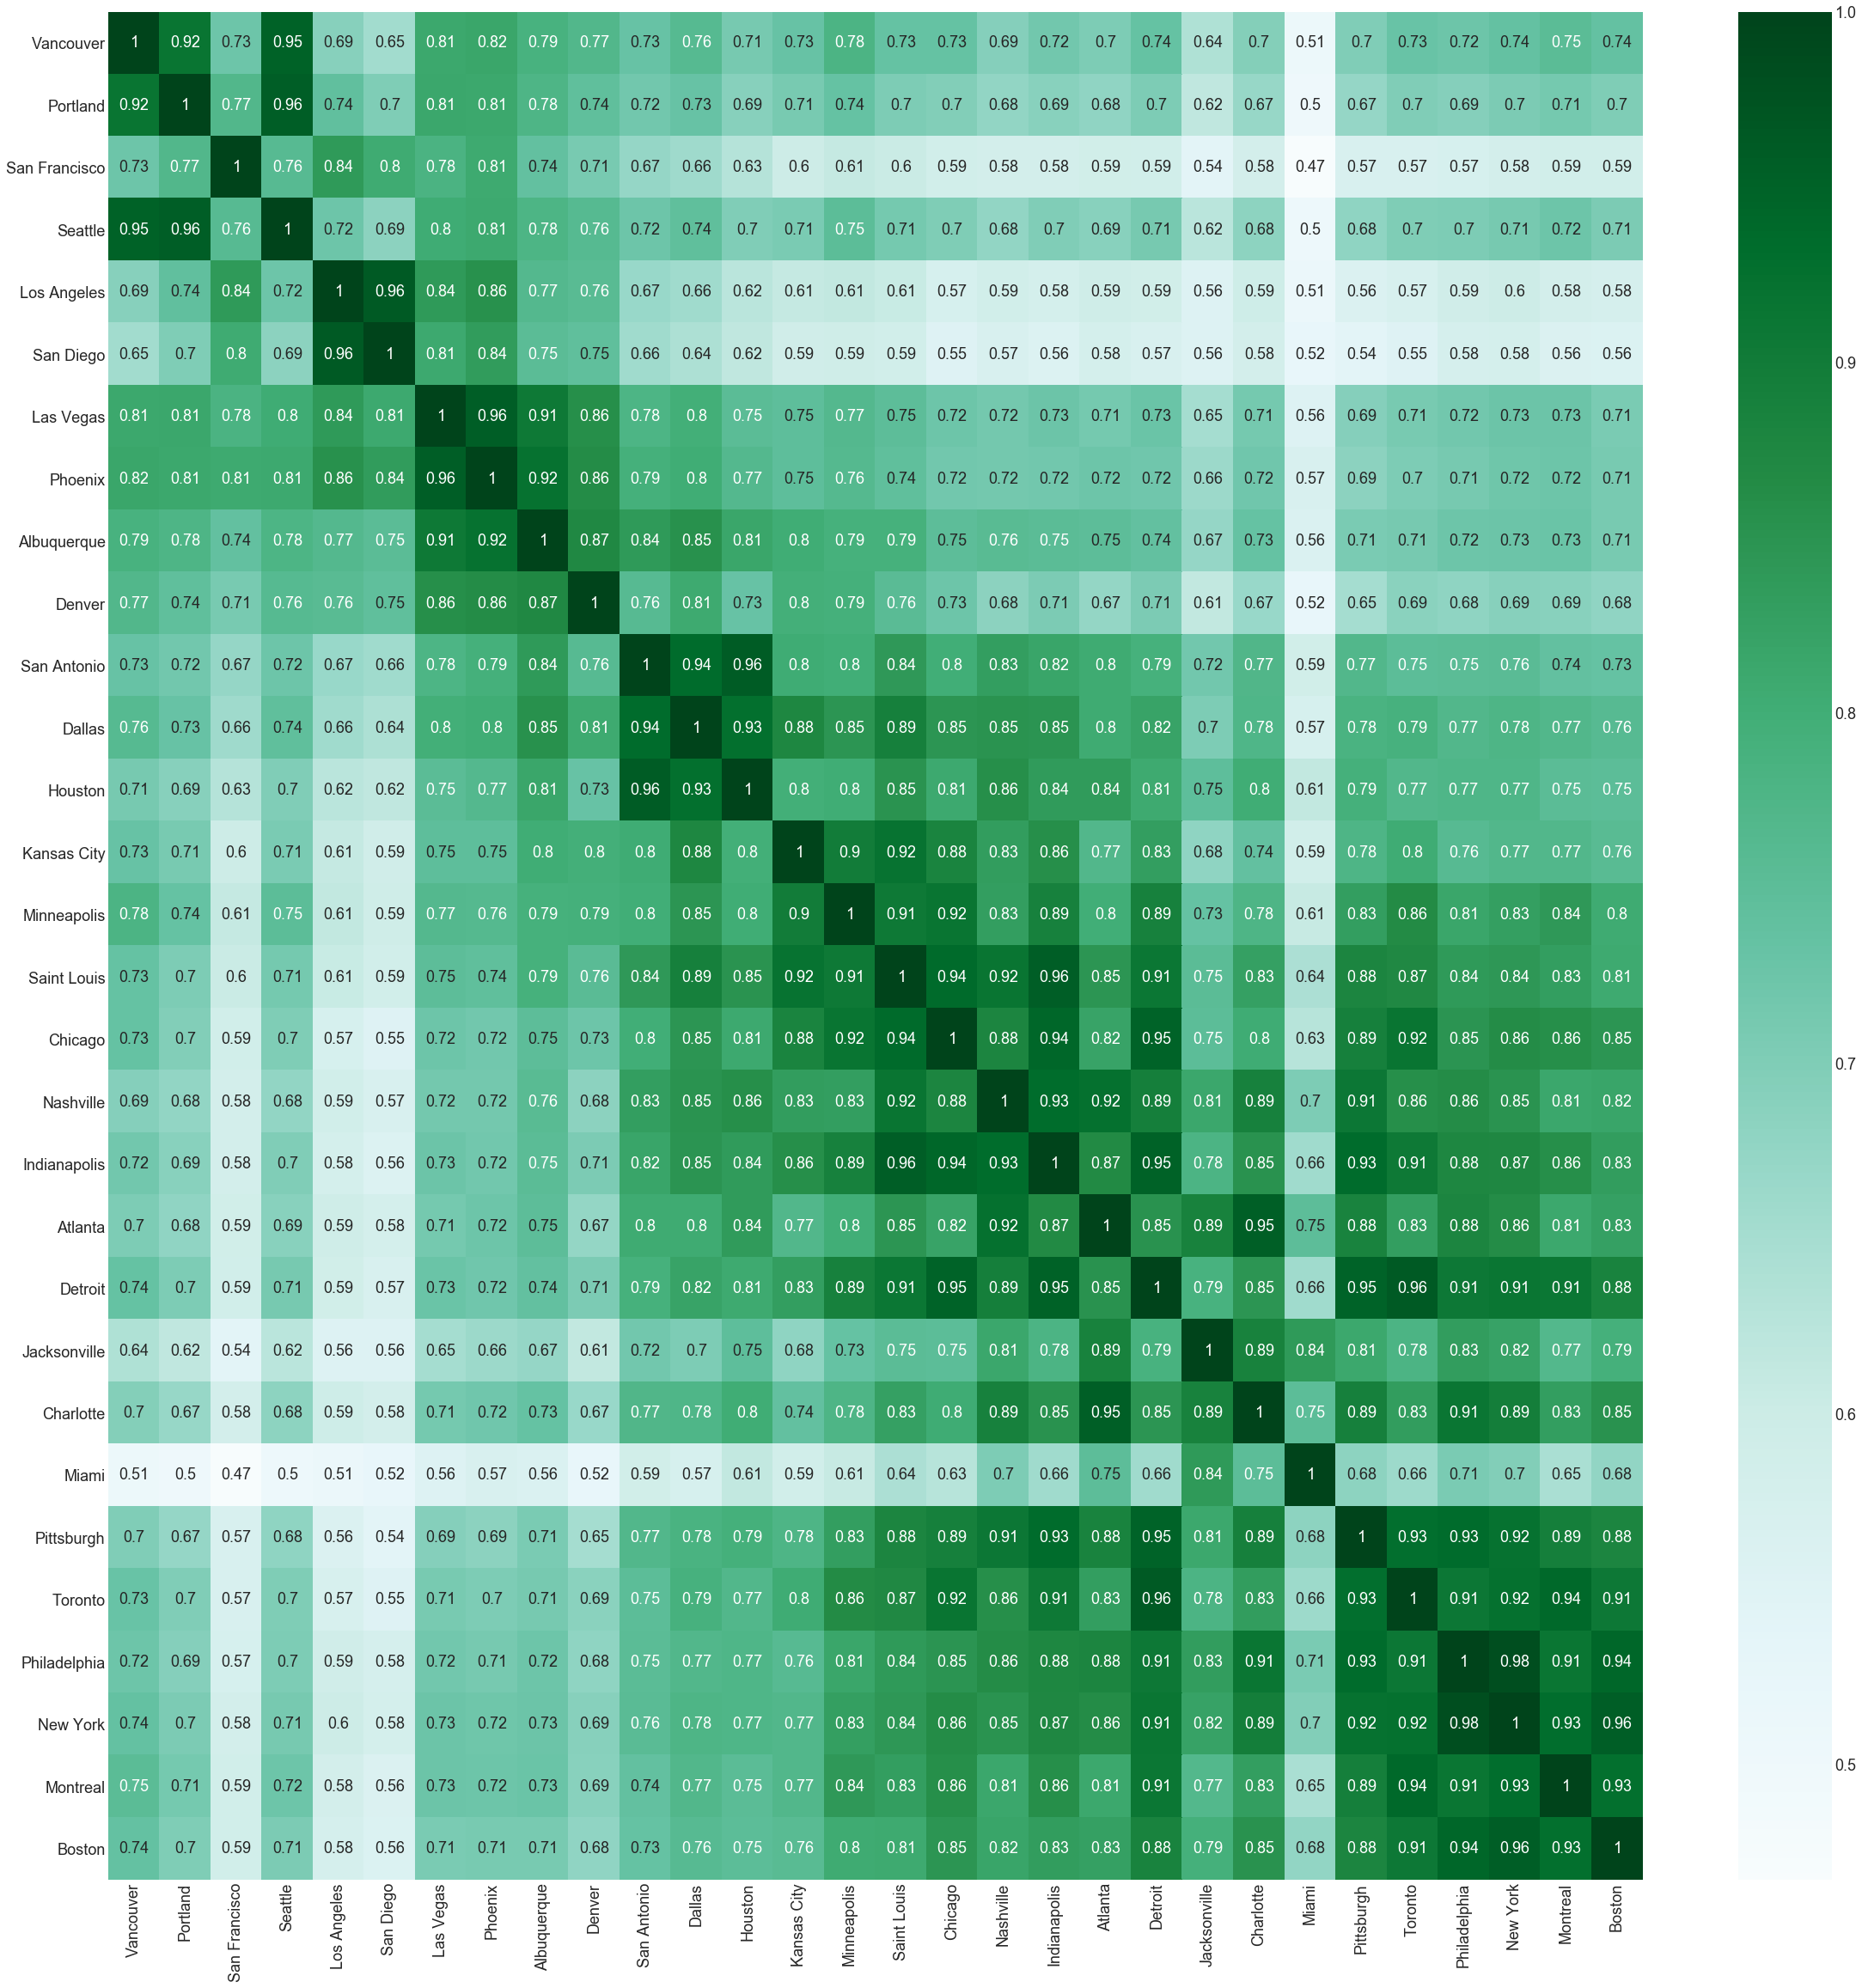

In [46]:
plt.figure(figsize=(40,40)) 
sns.heatmap(df.corr(), cmap='BuGn', annot=True)

## None of the regions are negatively correlated which implies that the cities experience winter and summer around the same time. The level of correlation is different among the cities. There are strongly related cities like San Antonio, Dallas, Houston in the Southern region and Detriot, Pittsburgh, Toronta, Philadelphia, New York, Montreal, Boston in the NorthEast region 
## Western  Region
### San Francisco, San Diego, Las Vegas, Phoenix, Albuquerque


##  Southern states
### San Antonio, Dallas, Houston are strongly correlated with temperatures increasing and decreasing in the same way.


## NorthWestern Region
### Portland, Seattle, Vancouver being strongly correlated


## NorthEast region
### Detriot, Pittsburgh, Totonto, Philadelphia, New York, Montreal, Boston

 #### .

## Exploratory data analysis and Inferential Statistics

     Main Concepts: Apply inferential statistics and hypothesis testing

     Learning Objectives:

        Understand the fundamentals of statistical inference and hypothesis testing
        Perform hypothesis testing for data to identify statistical significance
        Understand how hypothesis testing is applied


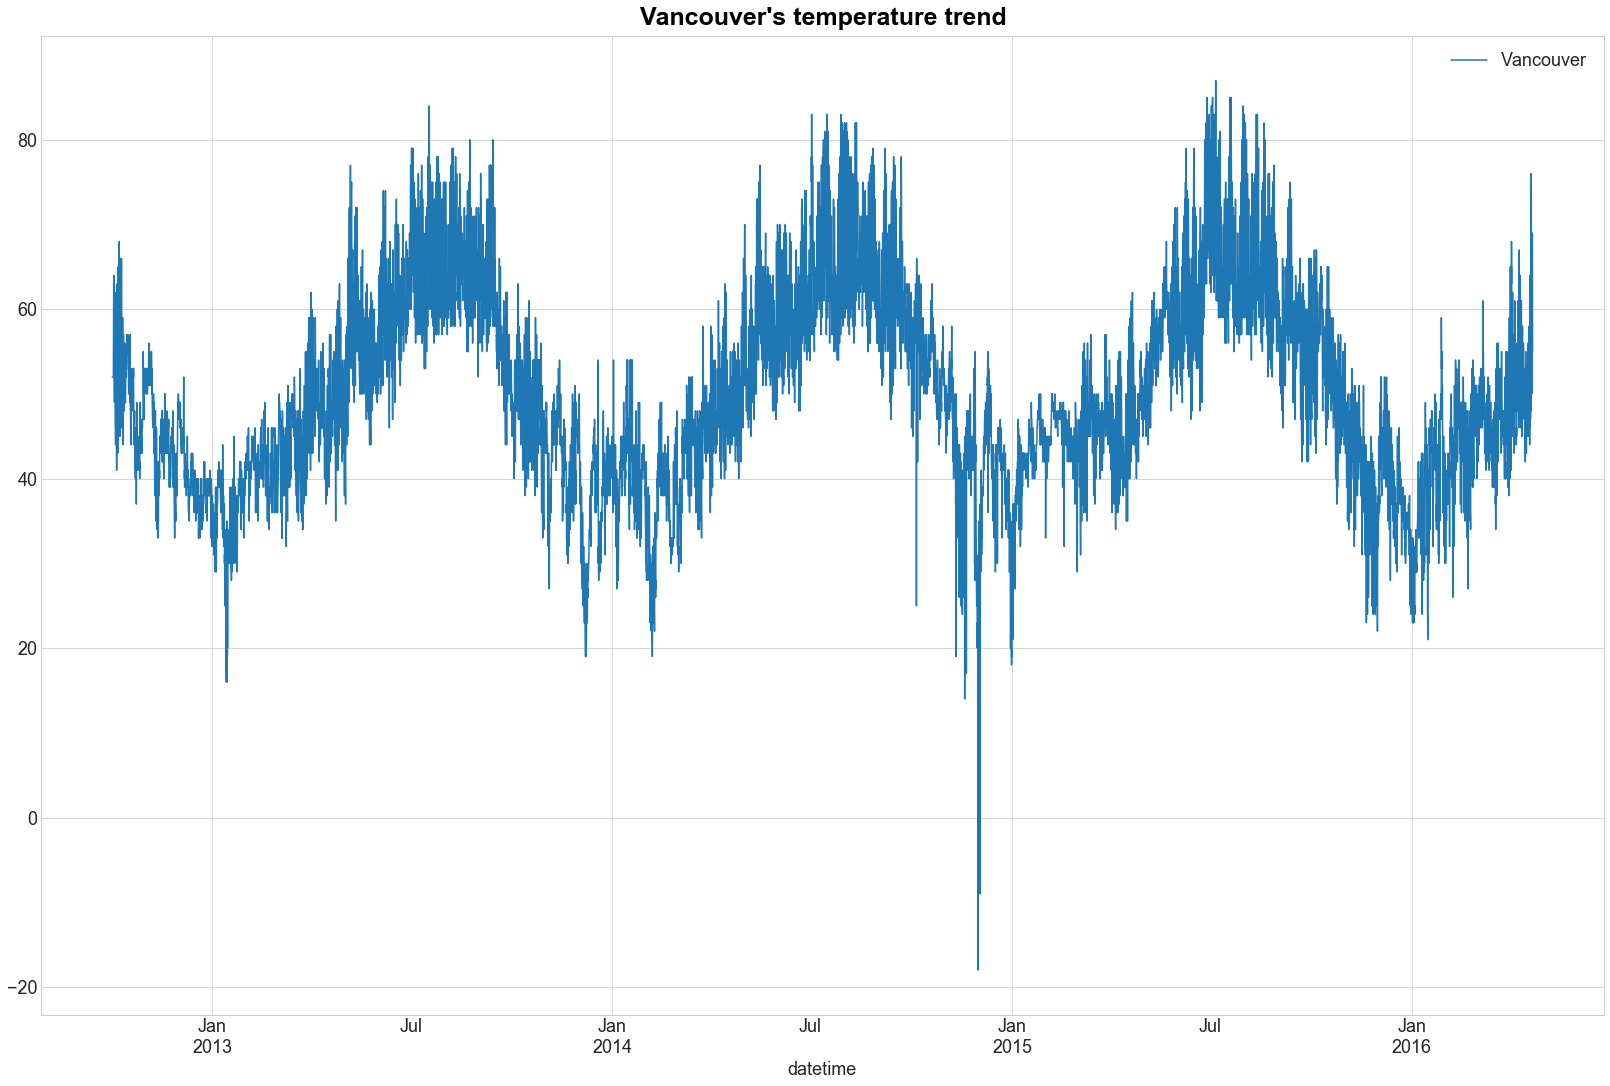

In [49]:
import scipy.stats as stats
import numpy as np

# November temperatures in 2013, 2014, 2015 at 7pm for Vancouver
df_nov_2013_7pm = df2013[(df2013.index.month == 11) & (df2013.index.hour == 19)][['Vancouver']]
df_nov_2014_7pm = df2014[(df2014.index.month == 11) & (df2014.index.hour == 19)][['Vancouver']]
df_nov_2015_7pm = df2015[(df2015.index.month == 11) & (df2015.index.hour == 19)][['Vancouver']]
dfs = [df_nov_2013_7pm, df_nov_2015_7pm]
df_nov_201315_7pm = pd.concat(dfs)

title_font = {'fontname':'Arial', 'size':'25', 'color':'black', 'weight':'bold',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space

#Temperature trend in Vancouver
df_van = df[['Vancouver']]
df_van.plot()
plt.title('Vancouver\'s temperature trend', **title_font)
plt.show()


#### Looking at the temperature trend of Vancouver, we can see there is significant drop in temperature in November 2014.
#### We will investigate this trend by the significance test. We have to conduct two tail test. 

#### We state the hypothesis as 
#### Ho : There is no change in November 2014 temperature and November temperature in 2013 and 2015
#### Ha : There is change in November 2014 temperature and November temperatures in 2013 and 2015 
#### Let the significance value, alpha = 0.05

In [50]:
# Calculate t-statistic 
mean_2014 = np.mean(df_nov_2014_7pm.Vancouver)
mean_201315 = np.mean(df_nov_201315_7pm.Vancouver)

diff_in_mean = mean_2014 - mean_201315
var_2014 = np.var(df_nov_2014_7pm.Vancouver)
var_201315 = np.var(df_nov_201315_7pm.Vancouver)

std = np.sqrt(var_2014/len(df_nov_2014_7pm) + var_201315/len(df_nov_201315_7pm) )

# population means have to be same for no change in temperatures 
t_stat = (diff_in_mean - 0)/std
p_value = stats.t.sf(np.abs(t_stat), len(df_nov_2014_7pm)+len(df_nov_201315_7pm)-2)*2
print("The p value: %7.4f" % p_value )

The p value:  0.1633


#### The p-value, 0.16 is greater than significance value of 0.05. By this we can reject the null hypothesis meaning there is indeed change in November temperature of 2014 and November temperatures of 2013 and 2015.
#### This can be explained by near record temperature in November 2014.